# Nonlinear dimensionality reduction

## Goals

* Visualize a single-cell dataset with t-SNE, UMAP and PHATE
* Understand how important parameter tuning is to visualization
* Understand how to compare the merits of different dimensionality reduction algorithms

In [0]:
!pip install --user scprep phate umap-learn

## 1. Loading the Retinal Bipolar dataset

*** Note: If scprep import fails, click on Runtime in the menu bar above and select "Restart runtime" and try again when the RAM and Disk (right hand side) has a green tick mark next to them . 

In [0]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Since we've done the preprocessing on this dataset before, we'll just download the preprocessed data from Google Drive.

In [0]:
scprep.io.download.download_google_drive("1pRYn62SOmmJxwVU0sSW7eBagRL2RJmx0", "shekhar_data.pkl")
scprep.io.download.download_google_drive("1FlNktWuJCka3pXOvNIFfRitGluZy2ftt", "shekhar_clusters.pkl")

In [0]:
data = pd.read_pickle("shekhar_data.pkl")
clusters = pd.read_pickle("shekhar_clusters.pkl")

## 2. t-SNE

#### What is tSNE?
t-SNE is the most popular visualization method for single cell RNA-sequencing data. The method was first introduced by Laurens van der Maaten in 2008 in the aptly named article ["Visualizing High-Dimensional Data Using t-SNE"](http://jmlr.org/papers/v9/vandermaaten08a.html). The goal of t-SNE is to produce a two or three dimensional embedding of a dataset that exists in many dimensions such that the embedding can be used for visualization.

By embedding, we're talking about projecting the data from high dimensions onto vectors in a smaller space.

The way t-SNE does this is by minimizing the difference between neighborhood distances (i.e. distances from a cell to a set of close cells) in the original high dimensional space and the lower dimensional embedding space. t-SNE is an optimization problem where the algorithm iteratively learns a series of transformations such that each successive transformation better minimizes this difference between the high and low dimensional neighborhood distances. 

This approach preserves local structure in the data. Cells that are close in high dimensional space (i.e. have small Euclidean distances) will also be close in low dimensional space. However, it also means that global structure will not be preserved. This means that the distance between "clusters" in a t-SNE plot don't have any meaning.


#### How to use t-SNE effectively

Unlike PCA, t-SNE has *hyperparameters* these are user-specified options that determine the output of t-SNE. Having hyperparameters isn't bad, but it is essential to understand what the hyperparameters are, what the effect of hyperpameter choices have on output, and how to select the best set of hyperparameters for a given research objective.

In 2016, a group from Google Brain published great essay in Distill about ["How to Use t-SNE Effectively"](https://distill.pub/2016/misread-tsne/). In the article, they provide an interactive tool to explore the effect of various hyperparameters of t-SNE on various datasets.

There are two main hyperparameters for t-SNE: **perplexity** and **learning rate** (sometimes called epsilon). Perplexity determines the "neighborhood size". Larger values of perplexity increase the number of points within the neighborhood. The reccomended range of t-SNE perplexity is roughly 5-50. Learning rate affects how quickly the algorithm "stablilizes". You probably don't need to change this, but should understand what it is.

This dataset consists of many cell types, which were mostly identified as Amacrine cells, Muller Glia, Rod Bipolar cells, and many subtypes of Cone Bipolar cells in [Shekhar et. al, 2016](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5003425/). We can plot the data using t-SNE, as was done in the original paper.

#### Reducing dimensionality with PCA to speed up t-SNE

t-SNE gets very slow with high-dimensional data. We can speed it up substantially by running PCA first to 100 dimensions.

Parameter "n_components" refers to the number of dimensions/principal components; "methods" refers to dimensionality reduction method applied prior to mean centering of sparse input. The choices are: 'svd', 'orth_rproj', 'rproj', 'dense', default is'svd'). The method choice affects accuracy (svd > orth_rproj > rproj) and comes with increased computational cost (but not memory.) On the other hand, method=’dense’ adds a memory cost but is faster.

In [0]:
data_pca = scprep.reduce.pca(data, n_components=100, method='dense')

#### Subsampling to speed up t-SNE even more

t-SNE is still slow even after PCA, so let's speed things up by using fewer points.

In [0]:
data_pca_subsample, clusters_subsample = scprep.select.subsample(data_pca, clusters, n=3000)

#### Running, plotting, & interpreting t-SNE

tSNE is implemented in `scikit-learn`. t-SNE is a manifold learning algorithm and you can find the t-SNE operator at [`sklearn.manifold.TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). At this link you will find details of what each parameter that you can use to run the t-SNE operator means.

We create a t-SNE operator and run it on data with the following syntax

```python
import sklearn.manifold
tsne_op = sklearn.manifold.TSNE(n_components=2, perplexity=30)
data_tsne = tsne_op.fit_transform(data)
```

Run the t-SNE operator with different perplexity parameters in code chunks below and study how that changes the t-SNE plot.  
***Def: Perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Different values can result in significanlty different results.

In [0]:
import sklearn.manifold
tsne_op = sklearn.manifold.TSNE(n_components = 2, perplexity = 30)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

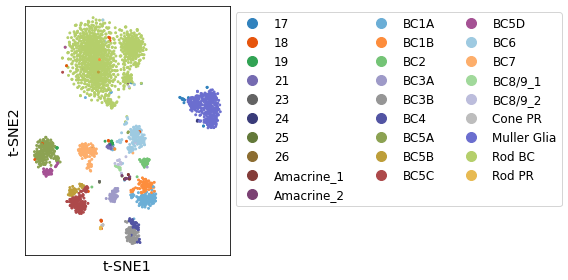

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [0]:
tsne_op = sklearn.manifold.TSNE(n_components =2, perplexity = 5)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

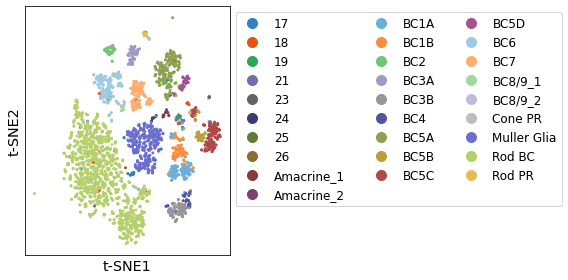

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [0]:
tsne_op = sklearn.manifold.TSNE(n_components = 2, perplexity = 20)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

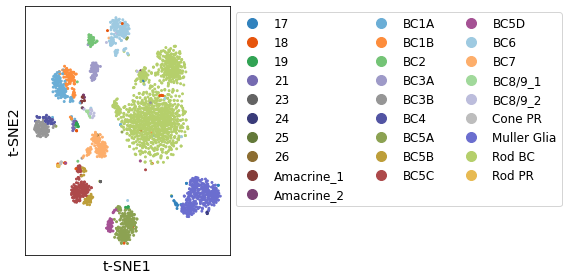

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [0]:
tsne_op = sklearn.manifold.TSNE(n_components = 2, perplexity = 40)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [0]:
tsne_op = sklearn.manifold.TSNE(n_components = 2, perplexity = 40)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

In [0]:
tsne_op = sklearn.manifold.TSNE(n_components = 2, perplexity = 50)
data_tsne = tsne_op.fit_transform(data_pca_subsample)

In [0]:
scprep.plot.scatter2d(data_tsne, c=clusters_subsample['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1),
                      ticks=False, label_prefix='t-SNE')

##What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells?



#### _Breakpoint_  - once you get here, please feel free to share your findings on the Slack Channel, or knock your TA on Zoom. 

## 3. UMAP - can we have a what is UMAP discussion?
### Run UMAP with different n_neighbors and min_dist parameters.

Even though UMAP is not a part of scikit-learn, the syntax for UMAP is identical to t-SNE: `umap.UMAP().fit_transform`. UMAP is relatively fast, so you won't need to use the subsampled data. We also don't need to do PCA beforehand, but since we've already done it we may as well.  
UMAPs have gained more traction because of its ability to retain "global" as well "local" structures of data structures. For more UMAP info???

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 50, min_dist = 0.5)
data_umap = umap_op.fit_transform(data_pca)

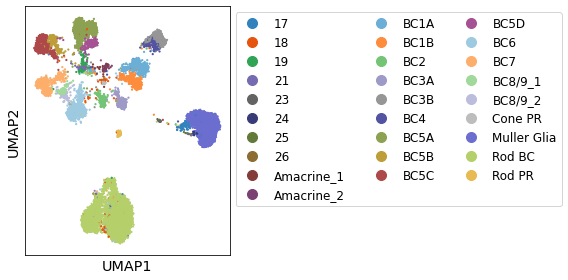

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 50, min_dist = 0.9)
data_umap = umap_op.fit_transform(data_pca)

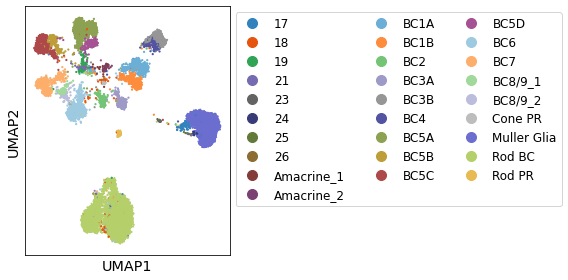

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 2, min_dist = 0.5)
data_umap = umap_op.fit_transform(data_pca)

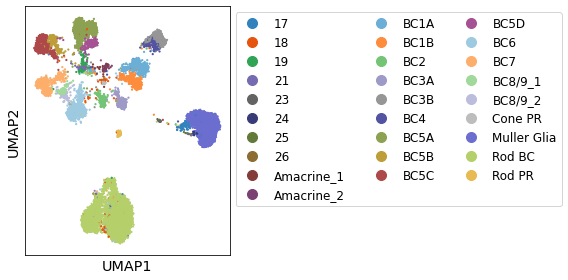

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 2, min_dist = 0.9)
data_umap = umap_op.fit_transform(data_pca)

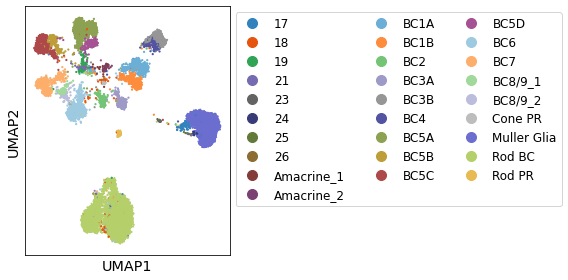

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 100, min_dist = 0.5)
data_umap = umap_op.fit_transform(data_pca)

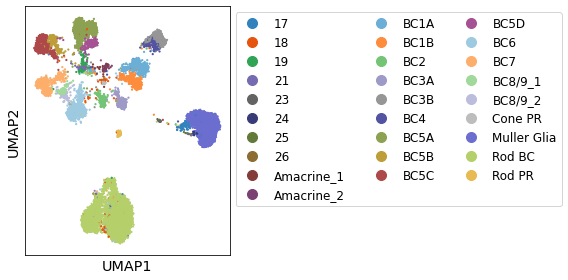

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 100, min_dist = 0.9)
data_umap = umap_op.fit_transform(data_pca)

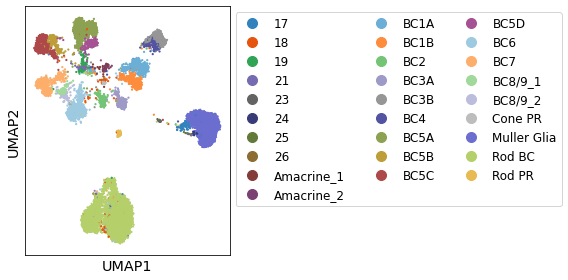

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 25, min_dist = 0.5)
data_umap = umap_op.fit_transform(data_pca)

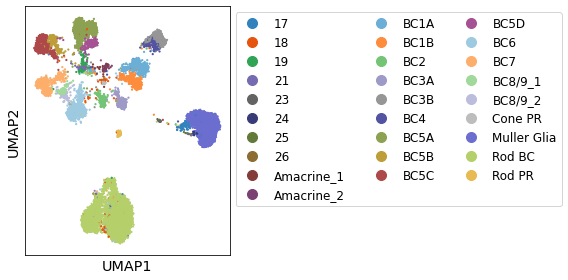

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 25, min_dist = 0.9)
data_umap = umap_op.fit_transform(data_pca)

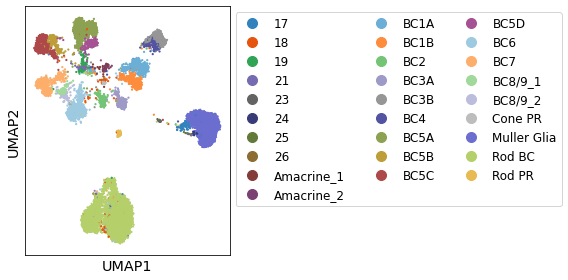

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 200, min_dist = 0.5)
data_umap = umap_op.fit_transform(data_pca)

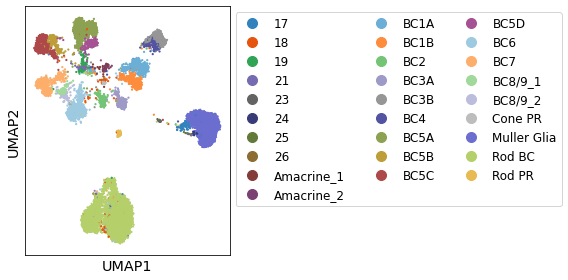

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

In [0]:
import umap
umap_op = umap.UMAP(n_neighbors = 200, min_dist = 0.9)
data_umap = umap_op.fit_transform(data_pca)

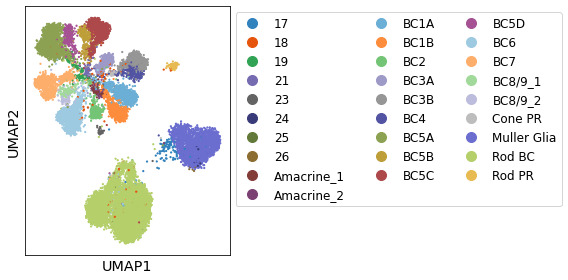

In [0]:
scprep.plot.scatter2d(data_umap, c=clusters['CELLTYPE'], figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='UMAP')

## What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells? How does this plot compare to t-SNE?

#### Breakpoint - once you get here, please feel free to share your findings on the Slack Channel, or knock your TA on Zoom.
## 4. PHATE: this will be covered in the preceding lecture, but can we add a PHATE intro here?  

In the following link you will find more information on what the different parameters you can use to run the PHATE operator mean. ["PHATE documentation"](https://phate.readthedocs.io/en/stable/api.html).

### Exercise - perform PHATE and plot the results

The syntax for PHATE is identical to UMAP and t-SNE: `phate.PHATE().fit_transform`. PHATE is relatively fast, so you won't need to use the subsampled data.  
PHATE's knn parameter describes the size of the neighborhood around each point. The t parameter describes how much denoising is performed. We recommend values between 2 and 100 for n_neighbors, and between 2 and 150 for t. Try a range of different values in and outside of these ranges and discuss the results with your group in Slack, or knock your TA on Zoom.

In [0]:
import phate
phate_op = phate.PHATE(knn = 10 , t = 10)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 10 , t = 100)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 50 , t = 10)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 50 , t = 100)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 100 , t = 10)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 100 , t = 100)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 200 , t = 10)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 200 , t = 100)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 2 , t = )
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

In [0]:
import phate
phate_op = phate.PHATE(knn = 2 , t = 200)
data_phate = phate_op.fit_transform(data_pca)

In [0]:
scprep.plot.scatter2d(data_phate, c=clusters['CELLTYPE'],
                      figsize=(8,4), legend_anchor=(1,1), ticks=False, label_prefix='PHATE')

What do you notice? Is your favorite cell type nicely separated in this plot? How obvious is the distinction between the macro-level cell types of cone bipolar, rod bipolar, and glial cells? How does this plot compare to t-SNE and UMAP?

### Discussion 

In groups, discuss the following questions:
1. In a dataset with clusters, how well does each method perform?
2. How might you determine which method is closest to the ground truth?
3. Which parameters are the most similar between methods?
4. Which method is the most / least sensitive to parameter selection?
5. If you run the same method with the same parameters multiple times, do you always get the same result?